# Analysis On Apple Stocks


In this notebook we will conducting data analysis on a csv file containing the following information. This .csv files contains information about the apple stock from 2012-2022. This includes relevent information like the opening and closing prices of a certain date. The volume at which this stock was traded. 

Lets start off with some basic descriptive statistics! We can achieve this utilizing the panda python package by reading the .csv file and running the .describe() function

In [3]:
import pandas as pd

data = pd.read_csv("SSF_2202_PRT.csv")

print(data.describe())

        Unnamed: 0        close         high          low         open  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    628.500000   167.723998   169.230475   166.039780   167.548266   
std     363.297628    56.850796    57.500128    56.006773    56.612707   
min       0.000000    90.340000    91.670000    89.470000    90.000000   
25%     314.250000   116.327500   117.405000   115.602500   116.482500   
50%     628.500000   160.485000   162.080000   158.974250   160.345000   
75%     942.750000   199.785000   201.277500   198.170000   199.520000   
max    1257.000000   327.200000   327.850000   323.350000   324.730000   

             volume     adjClose      adjHigh       adjLow      adjOpen  \
count  1.258000e+03  1258.000000  1258.000000  1258.000000  1258.000000   
mean   3.500397e+07   162.666715   164.131054   161.028013   162.493082   
std    1.729100e+07    58.733820    59.402842    57.869246    58.494560   
min    1.136204e+07    84.954351 

As you can see, we can observe the mean, standard deviation, mins and maxes, etc for each column in the .csv file. This is a great place to start!

## Lets get a summary of our finance data using the. .info function to get a deeper understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


The following sumamry tells us these main points in our data:

- there are a total of 15 columns
- the majority of the columns are of type float64 (10), 2 strings, and 3 int64
- there are 0 Null values in any of the columns

## Lets Create a graph to visualize the moving average over time

Step 1: Import the necessary libraries and read the CSV data into a pandas DataFrame.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("SSF_2202_PRT.csv")

Step 2: Convert the 'date' column to a datetime data type and set it as the index.


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

Step 3: Plot the time series data for 'close' prices to visualize the stock's performance over time.

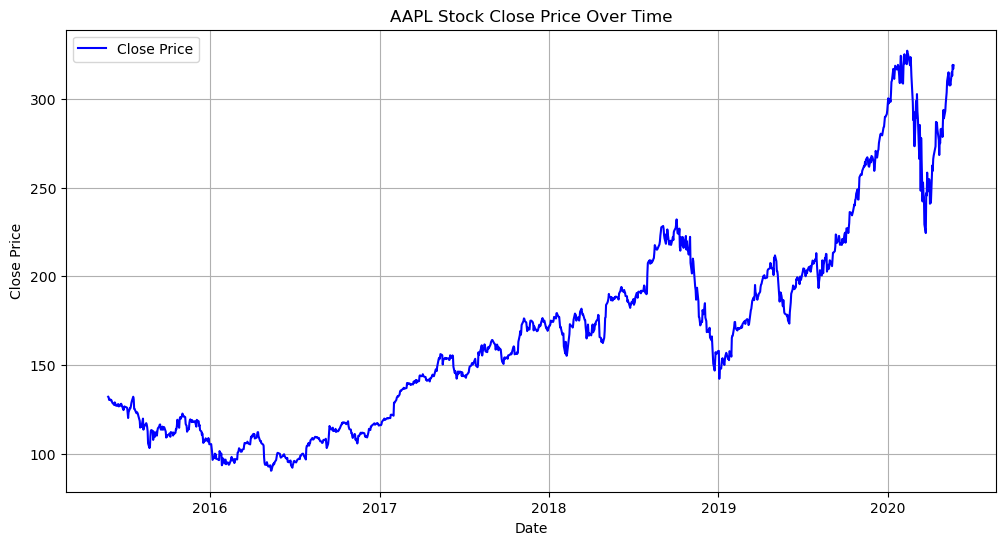

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Stock Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


Step 4: Calculate and plot the moving averages to identify trends in the stock's performance.

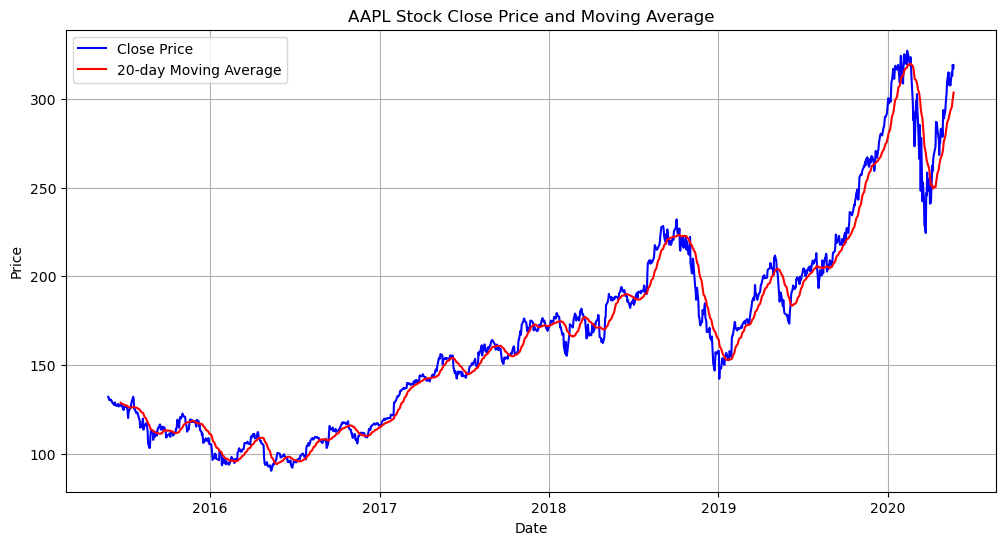

In [9]:
window = 20  # Adjust the window size as per your preference
data['MA'] = data['close'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Close Price', color='b')
plt.plot(data.index, data['MA'], label=f'{window}-day Moving Average', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Close Price and Moving Average')
plt.legend()
plt.grid(True)
plt.show()

### Lets use the seaborn package to plot the distribution of returns and check for volatitlity

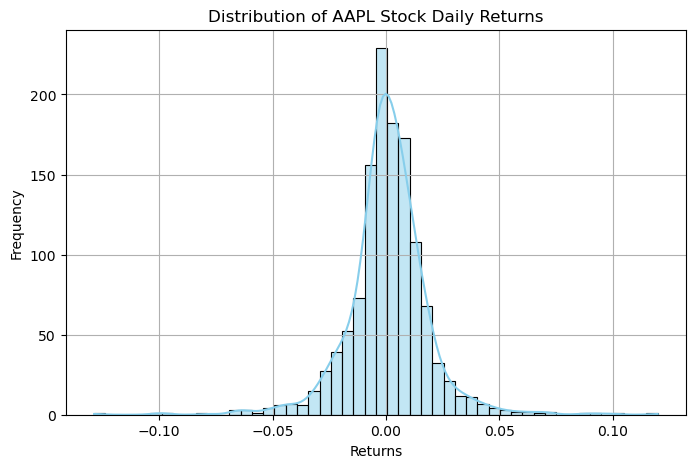

In [11]:
data['Returns'] = data['close'].pct_change()
plt.figure(figsize=(8, 5))
sns.histplot(data['Returns'].dropna(), bins=50, kde=True, color='skyblue')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Stock Daily Returns')
plt.grid(True)
plt.show()

### What can we say based on the graph about the volatility?

The average returns value for the Apple stock is looking to be right around -0.02-0.00. This means that on average, the stock's price does not change over the given period. In other words, the stock is expereineces little price movements and changes

By looking at this traders and investors may interpret a low average return as an indicator of low volatility and a low risk investment. 

### Lets dive deeper into this dataset and look at trading volumes 

Step 1: Import the necessary libraries and read the csv data into a dataframe

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the CSV file

data = pd.read_csv("SSF_2202_PRT.csv")

Step 2: convert the 'date' column to a datetime data type and set it as the index

In [13]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace = True)

Step 3: Plot the trading volume over time to visualize the trading activity

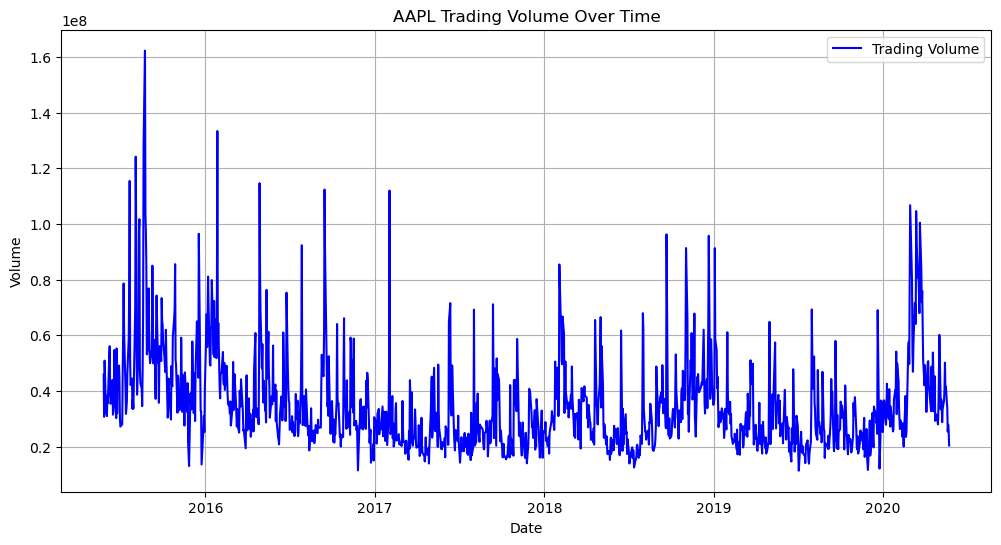

In [14]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['volume'], label='Trading Volume', color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Trading Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()

We can see that there was very steady activity for the Apple stock! 

### Next lets find out about the correlation between 'close', 'high', 'open', and 'volume'

What is correlation? Correlation is essentially looking for a relationship between a number of variables. In our case we are looking for any sort of realtionship between our columns 'close', 'high', 'open', and 'volume. I will now show my steps to determine the correlation in this dataset

Step 1: Import the required packages

In [15]:
import pandas as pd

# Read the CSV data into a DataFrame
data = pd.read_csv('SSF_2202_PRT.csv')

Step 2: Perform the correlation analysis, utilizing the .corr function

In [16]:
correlation_matrix = data[['close', 'high', 'low', 'volume']].corr()

print(correlation_matrix)

           close      high       low    volume
close   1.000000  0.999446  0.999473 -0.139941
high    0.999446  1.000000  0.999146 -0.124726
low     0.999473  0.999146  1.000000 -0.152665
volume -0.139941 -0.124726 -0.152665  1.000000


Step 3: Lets visualize the correlation matrix with a heatmap!

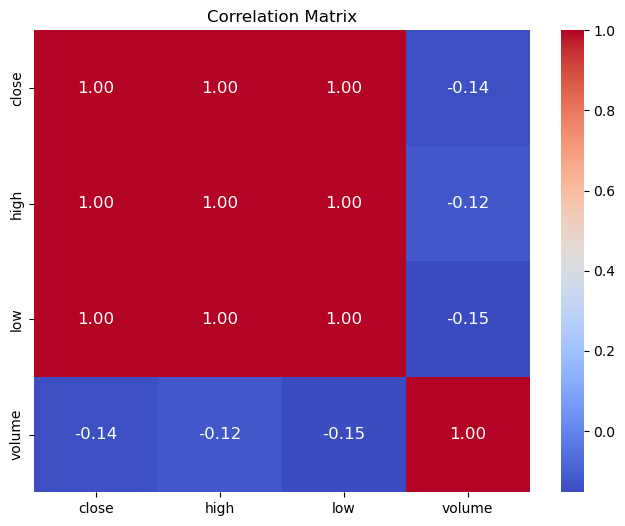

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Matrix')
plt.show()

How correlation work is that when a correaltion value is close to either 1 or -1 it means that there is a strong correlation. We can see based on this heatap there are strong positive correlations between 'low', 'high', and 'close'. It seems that there is weak correlation between 'volume' and the rest of the variables!

### Lets bring out a new dataset to compare to the APPL one!

Lets read this new dataset the same way we did before

In [18]:
import pandas as pd

#Please try this yourself

data = pd.read_csv("FB_stock_history.csv")

Lets utilize .describe() on this dataset to understand what kind of data we are dealing with here. Please try it yourself!

In [19]:
#print(data.describe())

print(data.describe())

              Open         High          Low        Close        Volume  \
count  2359.000000  2359.000000  2359.000000  2359.000000  2.359000e+03   
mean    139.606969   141.234324   137.958605   139.656876  3.095630e+07   
std      84.490691    85.465048    83.566847    84.565640  2.778137e+07   
min      18.080000    18.270000    17.549999    17.730000  5.913100e+06   
25%      74.935001    75.565002    74.020000    74.855000  1.564190e+07   
50%     130.979996   132.259995   129.770004   131.050003  2.220590e+07   
75%     184.914993   186.830002   183.419998   185.345001  3.597605e+07   
max     381.679993   384.329987   378.809998   382.179993  5.735764e+08   

       Dividends  Stock Splits  
count     2359.0        2359.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0  


This data as we can see is another stock data. To be exact this data set is a set of data for the stock of facebook. With this we will conduct a comparison test on our previous dataset for the stock prices of apple.

### We are going to graph both stocks performance

Since we have more than one stock dataset, we can compare the closing prices of both of the stocks! Not just this but we can compare other qualities like the moving average, volume, and other metrics to measure there performace

Step 1. Lets first import our libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Step 2. lets read the datasets into the variables "df1" and "df2"

In [26]:
df1 = pd.read_csv("AAPL.csv")
df2 = pd.read_csv("META.csv")

Step 3. filter dataset to have just "close" data

In [27]:
df1_close = df1[['Date', 'Close']]

print(df1_close)
df2_close = df2[['Date', 'Close']]
print(df2_close)

            Date       Close
0     2017-09-07   40.314999
1     2017-09-08   39.657501
2     2017-09-11   40.375000
3     2017-09-12   40.215000
4     2017-09-13   39.912498
...          ...         ...
1253  2022-08-30  158.910004
1254  2022-08-31  157.220001
1255  2022-09-01  157.960007
1256  2022-09-02  155.809998
1257  2022-09-06  154.529999

[1258 rows x 2 columns]
            Date       Close
0     2017-09-07  173.210007
1     2017-09-08  170.949997
2     2017-09-11  173.509995
3     2017-09-12  172.960007
4     2017-09-13  173.050003
...          ...         ...
1253  2022-08-30  157.160004
1254  2022-08-31  162.929993
1255  2022-09-01  165.360001
1256  2022-09-02  160.320007
1257  2022-09-06  158.539993

[1258 rows x 2 columns]


Step 4. Lets merge df1 and df2 into one big dataframe so that we can do things at one!

In [32]:
merged_df = pd.merge(df1_close, df2_close, left_on ='Date', right_on="Date", how ='inner')




# Rename the columns for clarity
merged_df.columns = ['Date', 'AAPL_Close', 'FB_Close']

print(merged_df)


            Date  AAPL_Close    FB_Close
0     2017-09-07   40.314999  173.210007
1     2017-09-08   39.657501  170.949997
2     2017-09-11   40.375000  173.509995
3     2017-09-12   40.215000  172.960007
4     2017-09-13   39.912498  173.050003
...          ...         ...         ...
1253  2022-08-30  158.910004  157.160004
1254  2022-08-31  157.220001  162.929993
1255  2022-09-01  157.960007  165.360001
1256  2022-09-02  155.809998  160.320007
1257  2022-09-06  154.529999  158.539993

[1258 rows x 3 columns]


Step 5. Lets calculate the daily percentage in closing prices!

In [33]:
merged_df['AAPL_Daily_Return'] = merged_df['AAPL_Close'].pct_change() * 100
merged_df['FB_Daily_Return'] = merged_df['FB_Close'].pct_change() * 100

In [34]:
print(merged_df['AAPL_Daily_Return'])

0            NaN
1      -1.630902
2       1.809239
3      -0.396285
4      -0.752212
          ...   
1253   -1.530550
1254   -1.063497
1255    0.470682
1256   -1.361110
1257   -0.821513
Name: AAPL_Daily_Return, Length: 1258, dtype: float64


Step 6: Let us now plot this data so that we can actually see how they compare

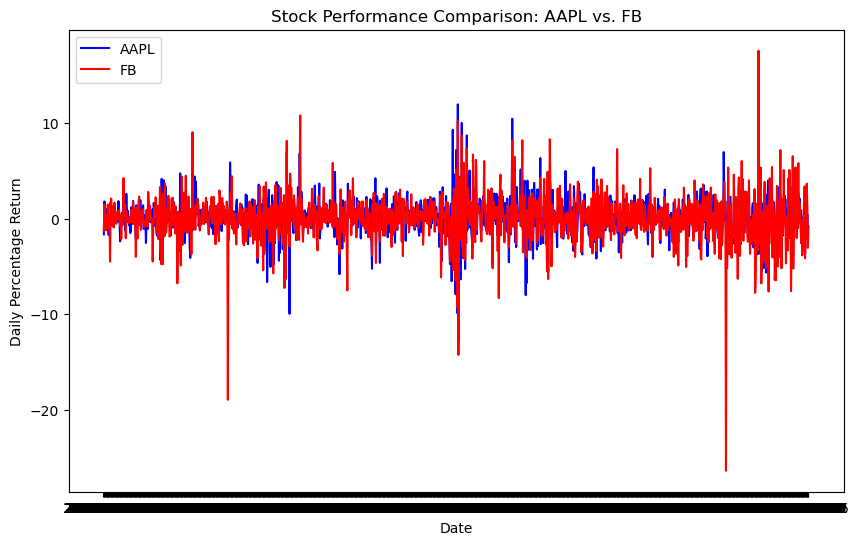

In [36]:
plt.figure(figsize = (10,6))

plt.plot(merged_df['Date'], merged_df['AAPL_Daily_Return'], label='AAPL', color='blue')
plt.plot(merged_df['Date'], merged_df['FB_Daily_Return'], label='FB', color='red')

plt.xlabel('Date')
plt.ylabel('Daily Percentage Return')
plt.title('Stock Performance Comparison: AAPL vs. FB')
plt.legend()

plt.show()

Hm..., this data is looking a little bit too clustered. We cannot really read and depict what is going on in this graph. There are huge spikes that may be considered as too huge of outliers.

In [46]:
# Filter the 'merged_df' based on the condition
filtered_df = merged_df[(merged_df['AAPL_Daily_Return'] < 4) & (merged_df['AAPL_Daily_Return'] > -4)]
filtered_df = filtered_df[(filtered_df['FB_Daily_Return'] < 4) & (filtered_df['FB_Daily_Return'] > -4)]

print(filtered_df)

            Date  AAPL_Close    FB_Close  AAPL_Daily_Return  FB_Daily_Return
1     2017-09-08   39.657501  170.949997          -1.630902        -1.304780
2     2017-09-11   40.375000  173.509995           1.809239         1.497513
3     2017-09-12   40.215000  172.960007          -0.396285        -0.316978
4     2017-09-13   39.912498  173.050003          -0.752212         0.052033
5     2017-09-14   39.570000  170.960007          -0.858122        -1.207741
...          ...         ...         ...                ...              ...
1253  2022-08-30  158.910004  157.160004          -1.530550        -1.262797
1254  2022-08-31  157.220001  162.929993          -1.063497         3.671411
1255  2022-09-01  157.960007  165.360001           0.470682         1.491443
1256  2022-09-02  155.809998  160.320007          -1.361110        -3.047892
1257  2022-09-06  154.529999  158.539993          -0.821513        -1.110288

[1107 rows x 5 columns]


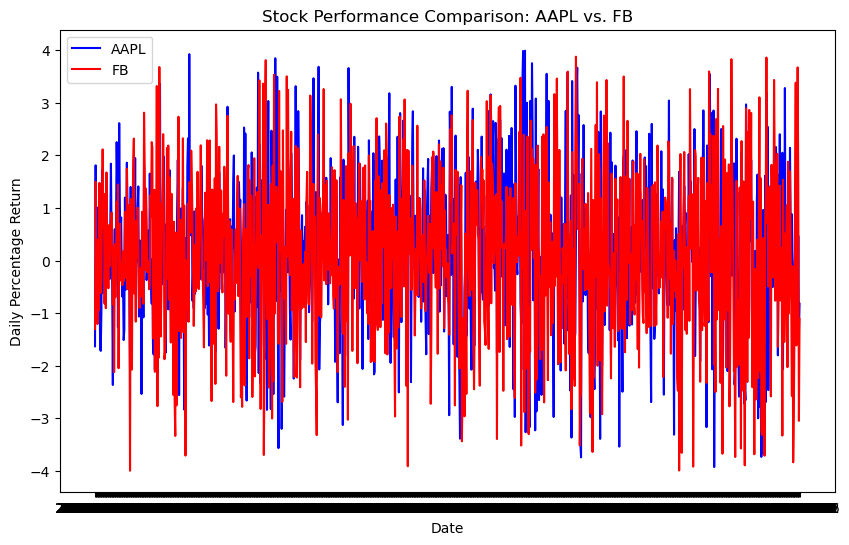

In [47]:
# We do the same plotting as before and see what the outcome is with our newly formed Filtered_data
plt.figure(figsize = (10,6))

plt.plot(filtered_df['Date'], filtered_df['AAPL_Daily_Return'], label='AAPL', color='blue')
plt.plot(filtered_df['Date'], filtered_df['FB_Daily_Return'], label='FB', color='red')

plt.xlabel('Date')
plt.ylabel('Daily Percentage Return')
plt.title('Stock Performance Comparison: AAPL vs. FB')
plt.legend()

plt.show()

This does not look any better..., Since we go through so many rows of data maybe thats why our graph looks so noisy. Lets do enough to sample what the comparison is.

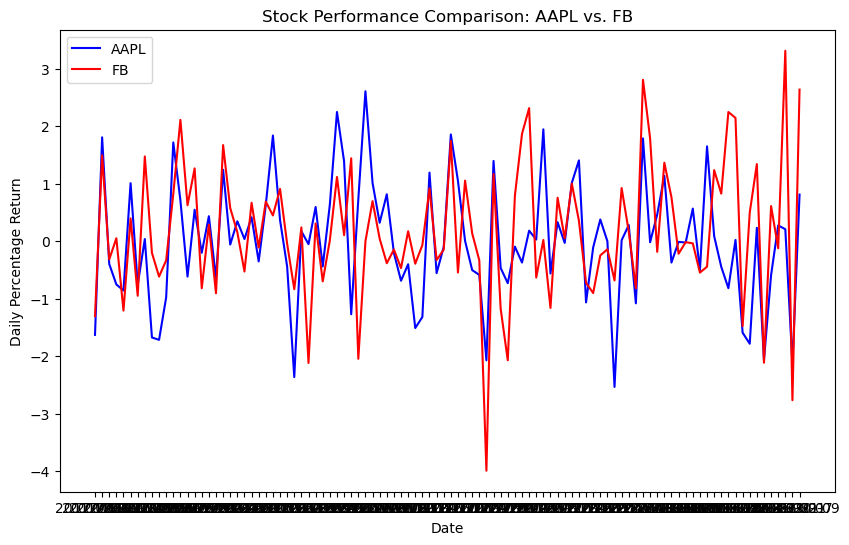

In [53]:
# this line gets the first 200 lines
filtered_df = filtered_df.head(200)

# We do the same plotting as before and see what the outcome is with our newly formed Filtered_data
plt.figure(figsize = (10,6))

plt.plot(filtered_df['Date'], filtered_df['AAPL_Daily_Return'], label='AAPL', color='blue')
plt.plot(filtered_df['Date'], filtered_df['FB_Daily_Return'], label='FB', color='red')

plt.xlabel('Date')
plt.ylabel('Daily Percentage Return')
plt.title('Stock Performance Comparison: AAPL vs. FB')
plt.legend()

plt.show()

Based on all of the graphs that we have created and observed we can safely say that facebook has been the stock with more fluctuating returns over the course of time. We know that the apple stock was extremely "safe" because of its low volatitlity. Now that we have comapred with another stock we can see that the safety of the apple stock defiently shows

### Practice Problems

1. Utilizing the first data set, can you plot the values on the "open" column?
2. Utilizing the first data set, filter the open column for values above 400.